In [156]:
#Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_auc_score,roc_curve

In [157]:
#Importing the dataset
loan=pd.read_csv("C:\\Users\\Ramya\\Desktop\\Bank loan Project\\bank-loan.csv")

In [158]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 9 columns):
age         850 non-null int64
ed          850 non-null int64
employ      850 non-null int64
address     850 non-null int64
income      850 non-null int64
debtinc     850 non-null float64
creddebt    850 non-null float64
othdebt     850 non-null float64
default     700 non-null float64
dtypes: float64(4), int64(5)
memory usage: 59.9 KB


In [159]:
loan.describe()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000
mean,35.029412,1.710588,8.565882,8.371765,46.675294,10.171647,1.576805,3.078789,0.261429
std,8.041432,0.927784,6.777884,6.895016,38.543054,6.719441,2.125840,3.398803,0.439727
min,20.000000,1.000000,0.000000,0.000000,13.000000,0.100000,0.011696,0.045584,0.000000
25%,29.000000,1.000000,3.000000,3.000000,24.000000,5.100000,0.382176,1.045942,0.000000
50%,34.000000,1.000000,7.000000,7.000000,35.000000,8.700000,0.885091,2.003243,0.000000
75%,41.000000,2.000000,13.000000,12.000000,55.750000,13.800000,1.898440,3.903001,1.000000
max,56.000000,5.000000,33.000000,34.000000,446.000000,41.300000,20.561310,35.197500,1.000000


                                        EXPLORATORY DATA ANALYSIS

In [160]:
#Finding out if there are any missing values
loan['default'].isnull().value_counts()

False    700
True     150
Name: default, dtype: int64

In [161]:
#Filling the missing values in default column with median
loan['default'].fillna(loan['default'].median(),inplace=True)

In [162]:
# Checking if there are any missing values left
loan['default'].isnull().value_counts()

False    850
Name: default, dtype: int64

In [163]:
#dropping the address column which is of no use
loan=loan.drop(['address'],axis=1)

In [164]:
loan

,age,ed,employ,income,debtinc,creddebt,othdebt,default
0,41,3,17,176,9.3,11.359392,5.008608,1.0
1,27,1,10,31,17.3,1.362202,4.000798,0.0
2,40,1,15,55,5.5,0.856075,2.168925,0.0
3,41,1,15,120,2.9,2.658720,0.821280,0.0
4,24,2,2,28,17.3,1.787436,3.056564,1.0
...,...,...,...,...,...,...,...,...
845,34,1,12,32,2.7,0.239328,0.624672,0.0
846,32,2,12,116,5.7,4.026708,2.585292,0.0
847,48,1,13,38,10.8,0.722304,3.381696,0.0
848,35,2,1,24,7.8,0.417456,1.454544,0.0


                                    IMPLEMENTING THE MACHINE LEARNING MODEL

In [165]:
X = loan.iloc[:, [0,6]].values
y = loan.iloc[:,7].values

In [166]:
#Splitting the dataset into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


                                              FEATURE SCALING

In [167]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

                                          LOGISTIC REGRESSION MODEL

In [168]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state = 0)
classifier.fit(X_train,y_train)

C:\Users\Ramya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [169]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)


In [170]:
#confusion matrix
cm=confusion_matrix(y_test,y_pred)

In [171]:
cm

array([[201,   0],
       [ 52,   2]], dtype=int64)

In [172]:
#Accuracy
acc=accuracy_score(y_test,y_pred)

In [173]:
acc

0.796078431372549

In [174]:
#classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.79      1.00      0.89       201
         1.0       1.00      0.04      0.07        54

    accuracy                           0.80       255
   macro avg       0.90      0.52      0.48       255
weighted avg       0.84      0.80      0.71       255



LOGISTIC MODEL ACCURACY IS 80%

In [175]:
# plotting the ROC CURVE

In [176]:
from sklearn.metrics import roc_curve

In [177]:
true_positive_rate,false_positive_rate,threshold = roc_curve(y_test,y_pred)

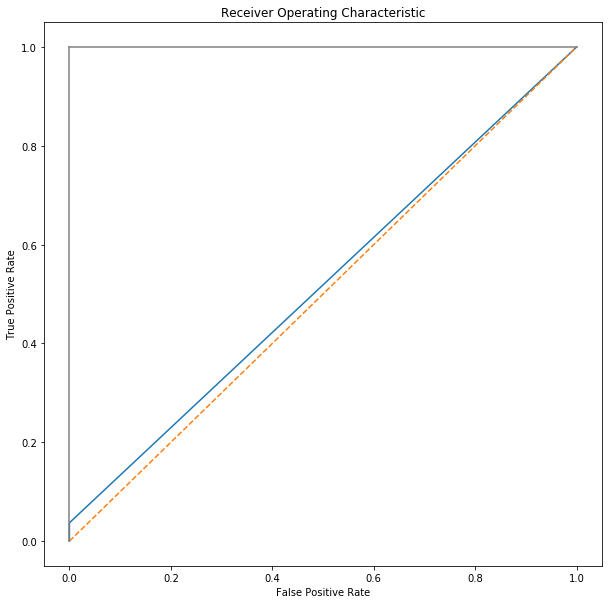

In [178]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(true_positive_rate, false_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".5"), plt.plot([1, 1] , c=".5")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [179]:
# calculate AUC
auc = roc_auc_score(y_test,y_pred)
print('AUC: %.3f' % auc)

AUC: 0.519


                                               DECISION TREE CLASSIFIER

In [180]:
from sklearn.tree import DecisionTreeClassifier

In [181]:
classifier=DecisionTreeClassifier(criterion='entropy',random_state=0)

In [182]:
classifier.fit(X_train,y_train)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [183]:
y_pred=classifier.predict(X_test)

In [184]:
cm=confusion_matrix(y_test,y_pred)

In [185]:
cm

array([[165,  36],
       [ 38,  16]], dtype=int64)

In [186]:
acc=accuracy_score(y_test,y_pred)

In [187]:
acc

0.7098039215686275

In [188]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.82      0.82       201
         1.0       0.31      0.30      0.30        54

    accuracy                           0.71       255
   macro avg       0.56      0.56      0.56       255
weighted avg       0.71      0.71      0.71       255



In [189]:
#calculate AUC score
auc = roc_auc_score(y_test,y_pred)
print('AUC: %.3f' % auc)

AUC: 0.559


In [190]:
from sklearn.metrics import roc_curve

In [191]:
true_positive_rate,false_positive_rate,threshold = roc_curve(y_test,y_pred)

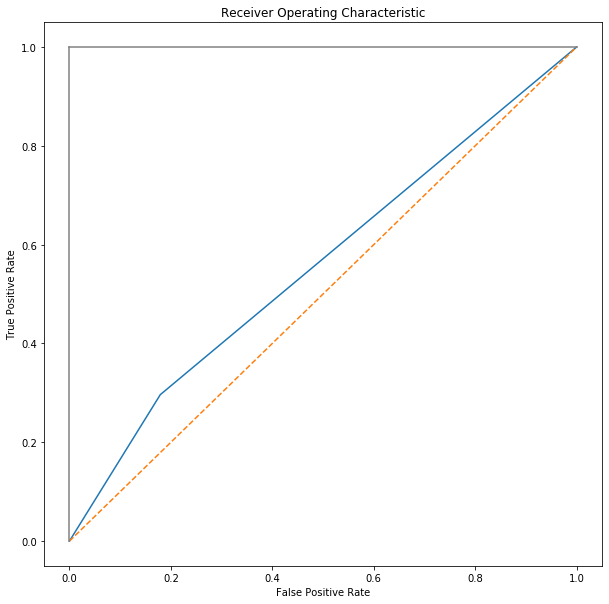

In [192]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(true_positive_rate, false_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".5"), plt.plot([1, 1] , c=".5")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

                                          RANDOM FOREST CLASSIFIER

In [193]:
from sklearn.ensemble import RandomForestClassifier

In [194]:
classifier=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)

In [195]:
classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [196]:
y_pred=classifier.predict(X_test)

In [197]:
cm=confusion_matrix(y_test,y_pred)

In [198]:
cm

array([[183,  18],
       [ 41,  13]], dtype=int64)

In [199]:
acc=accuracy_score(y_test,y_pred)

In [200]:
acc

0.7686274509803922

In [201]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.82      0.91      0.86       201
         1.0       0.42      0.24      0.31        54

    accuracy                           0.77       255
   macro avg       0.62      0.58      0.58       255
weighted avg       0.73      0.77      0.74       255



In [202]:
from sklearn.metrics import roc_curve

In [203]:
true_positive_rate,false_positive_rate,threshold = roc_curve(y_test,y_pred)

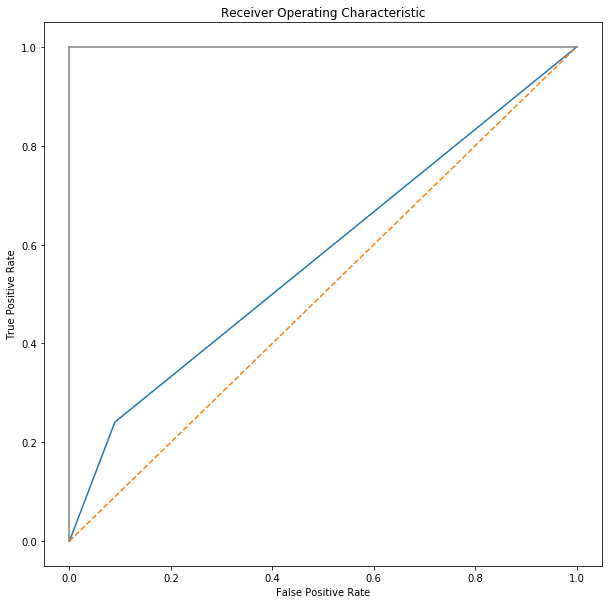

In [204]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(true_positive_rate, false_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".5"), plt.plot([1, 1] , c=".5")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [205]:
#calculate AUC score
auc = roc_auc_score(y_test,y_pred)
print('AUC: %.3f' % auc)

AUC: 0.576


                                           BOOSTING TECHNIQUES ---XG BOOSTING

In [206]:
from xgboost.sklearn import XGBClassifier
classifier=XGBClassifier()

In [207]:
classifier=XGBClassifier()

In [208]:
classifier.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [209]:
y_pred=classifier.predict(X_test)

In [210]:
cm=confusion_matrix(y_test,y_pred)

In [211]:
cm

array([[187,  14],
       [ 40,  14]], dtype=int64)

In [212]:
acc=accuracy_score(y_test,y_pred)

In [213]:
acc

0.788235294117647

In [214]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.82      0.93      0.87       201
         1.0       0.50      0.26      0.34        54

    accuracy                           0.79       255
   macro avg       0.66      0.59      0.61       255
weighted avg       0.76      0.79      0.76       255



In [215]:
from sklearn.metrics import roc_curve

In [216]:
true_positive_rate,false_positive_rate,threshold = roc_curve(y_test,y_pred)

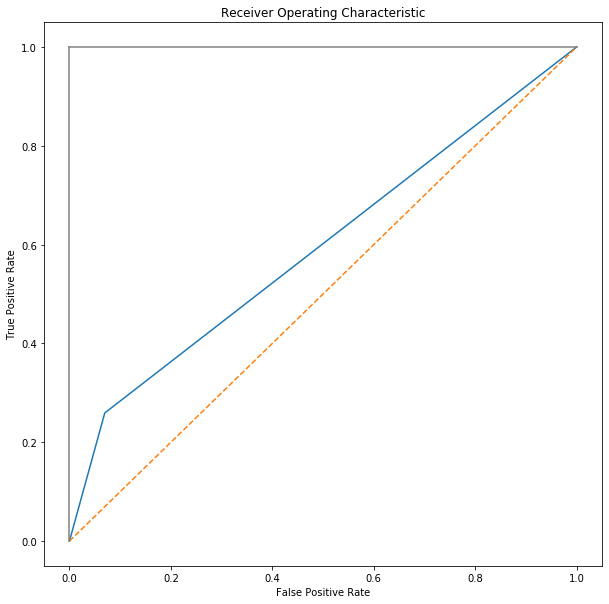

In [217]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(true_positive_rate, false_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".5"), plt.plot([1, 1] , c=".5")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [218]:
#calculate AUC score
auc = roc_auc_score(y_test,y_pred)
print('AUC: %.3f' % auc)

AUC: 0.595


                                 BOOSTING TECHNIQUE--ADAPTIVE GRADIENT BOOSTING

In [219]:
from sklearn.tree import DecisionTreeClassifier

In [220]:
classifier=DecisionTreeClassifier(criterion='entropy',max_depth=1)

In [221]:
from sklearn.ensemble import AdaBoostClassifier

In [222]:
AdaBoost=AdaBoostClassifier(base_estimator=classifier,n_estimators=500,learning_rate=1)

In [223]:
boostmodel=AdaBoost.fit(X_train,y_train)

In [224]:
y_pred=boostmodel.predict(X_test)

In [225]:
cm=confusion_matrix(y_test,y_pred)

In [226]:
cm

array([[190,  11],
       [ 44,  10]], dtype=int64)

In [227]:
acc=accuracy_score(y_test,y_pred)

In [228]:
acc

0.7843137254901961

In [229]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.95      0.87       201
         1.0       0.48      0.19      0.27        54

    accuracy                           0.78       255
   macro avg       0.64      0.57      0.57       255
weighted avg       0.74      0.78      0.75       255



In [230]:
from sklearn.metrics import roc_curve

In [231]:
true_positive_rate,false_positive_rate,threshold = roc_curve(y_test,y_pred)

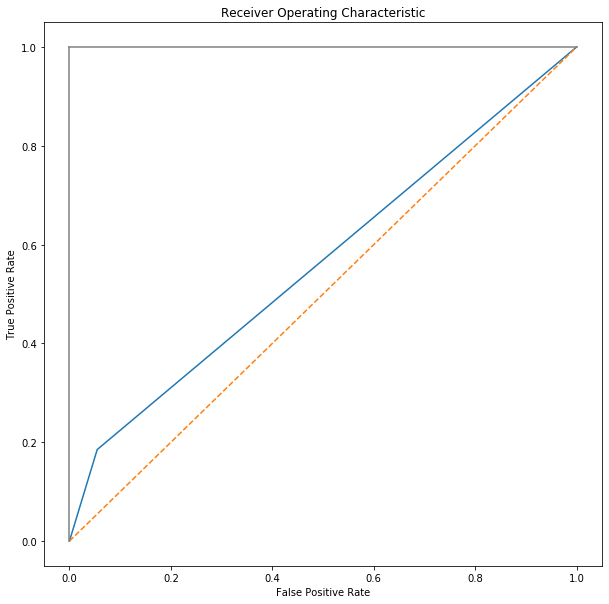

In [232]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(true_positive_rate, false_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".5"), plt.plot([1, 1] , c=".5")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [233]:
#calculate AUC score
auc = roc_auc_score(y_test,y_pred)
print('AUC: %.3f' % auc)

AUC: 0.565
